In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
p=Path("/content/drive/MyDrive/Dataset")
dirs=p.glob("*")

image_data=[]
labels=[]

image_paths= []
labels_dict={"Pikachu":0,"Bulbasaur":1,"Meowth":2}
label2pokemon={0:"Pikachu",1:"Bulbasaur",2:"Meowth"}

for folder_dir in dirs:
  label=(str(folder_dir).split("/")[-1])

  cnt=0
  print(folder_dir)

  for img_path in folder_dir.glob("*.jpg"):
    img=image.load_img(img_path,target_size=(40,40))
    img_array=image.img_to_array(img)
    image_data.append(img_array)
    labels.append(labels_dict[label])
    cnt+=1

  print(cnt)

/content/drive/MyDrive/Dataset/Bulbasaur
174
/content/drive/MyDrive/Dataset/Pikachu
199
/content/drive/MyDrive/Dataset/Meowth
70


In [4]:
print(len(image_data))
print(len(labels))

443
443


In [5]:
X=np.array(image_data)
Y=np.array(labels)

print(X.shape)
print(Y.shape)

(443, 40, 40, 3)
(443,)


In [6]:
def drawImg(img,label):
  plt.title(label2pokemon[label])
  plt.imshow(img)
  plt.show()

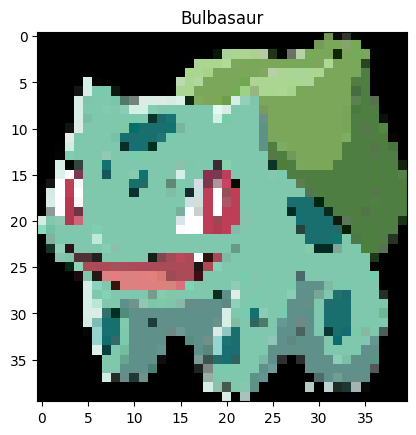

In [7]:
drawImg(X[0]/255.0,Y[0])

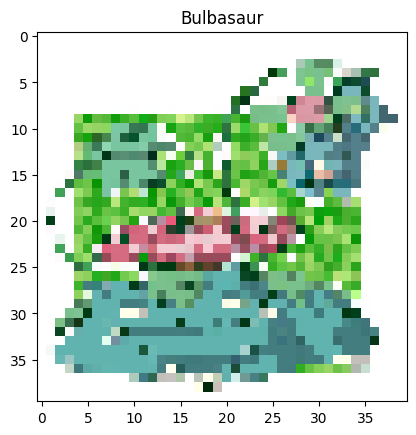

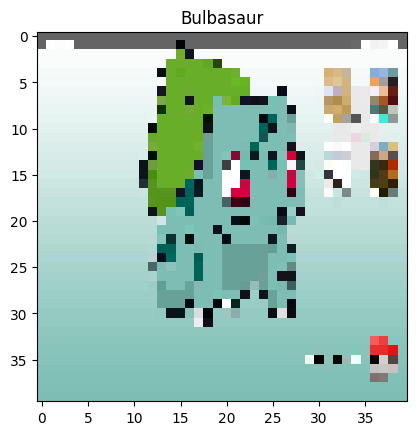

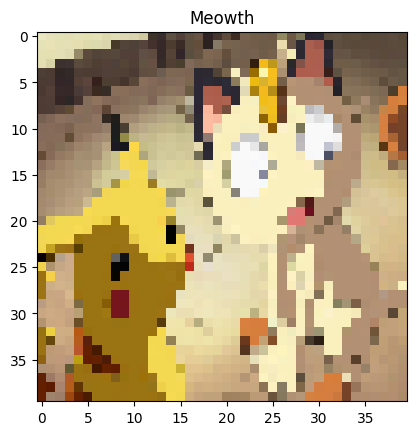

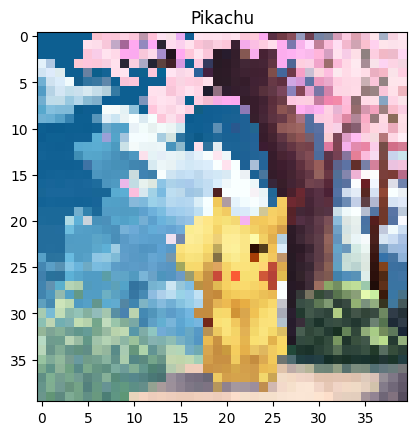

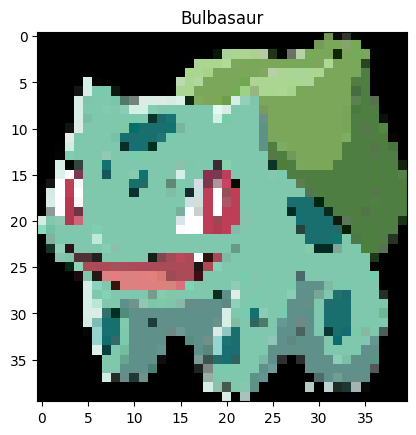

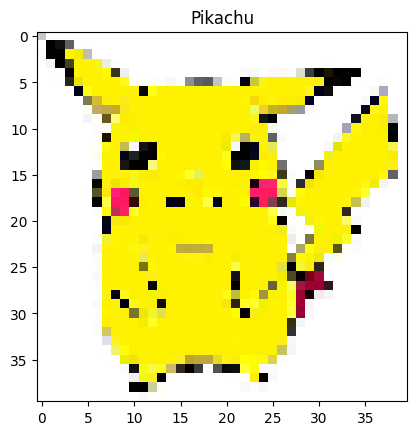

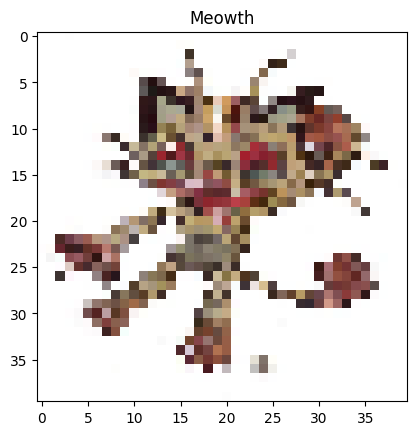

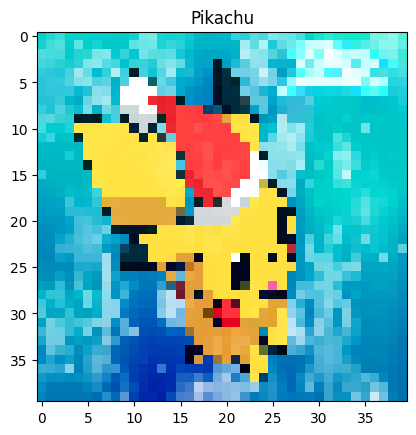

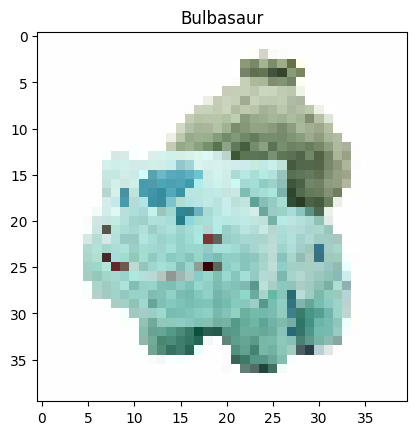

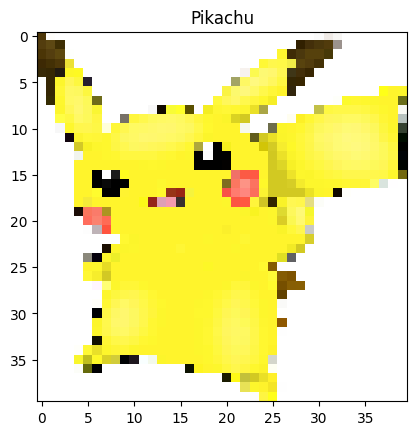

In [8]:
for i in range(10):
  r=np.random.randint(400)
  drawImg(X[r]/255.0,Y[r])

In [9]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
X=X/255.0

In [10]:
split =int (X.shape[0]*.8)

X_=np.array(X)
Y_=np.array(Y)

X=X_[:split,:]
Y=Y_[:split]

XTest=X_[split:,:]
YTest=Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(354, 40, 40, 3) (354,)
(89, 40, 40, 3) (89,)


In [19]:
class NeuralNetwork:

    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)

        model = {} #Dictionary

        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))

        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))

        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))

        self.model = model
        self.activation_outputs = None

    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']

        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)

        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)

        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)

        self.activation_outputs = (a1,a2,y_)
        return y_

    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]

        a1,a2,y_ = self.activation_outputs

        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)

        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)

        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)


        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1

        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2

        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3

        # :)

    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)

    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs

        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [20]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):

    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [21]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []

    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)

    for ix in range(epochs):

        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)

        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))


    return training_loss

In [22]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3) #4800 features(40X40X3)

In [23]:
print(X.shape)

(354, 4800)


In [24]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(354, 4800)
(89, 4800)


In [25]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 3.1108
Epoch 50 Loss 0.2760
Epoch 100 Loss 0.1281
Epoch 150 Loss 0.0926
Epoch 200 Loss 0.0688
Epoch 250 Loss 0.0571
Epoch 300 Loss 0.0489
Epoch 350 Loss 0.0427
Epoch 400 Loss 0.0374
Epoch 450 Loss 0.0325


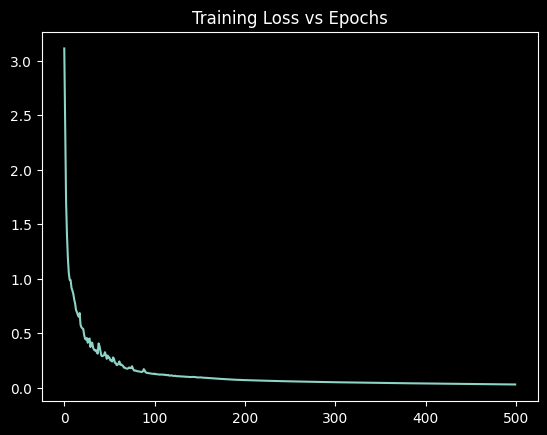

In [26]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [27]:
# Accuracy
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc

print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9831
Test Acc 0.6180


In [28]:
from sklearn.metrics import confusion_matrix

In [31]:
!pip install visualize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visualize: filename=visualize-0.5.1-py3-none-any.whl size=11479 sha256=9b14951eab3458baa548c25fdd29d03492d551cfca70c69497dd6c2449127c69
  Stored in directory: /root/.cache/pip/wheels/00/3a/5c/36e2da8b63978326a610c9b99af5da59d657ef97b854780d5a
Successfully built visualize


In [43]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[159   0   2]
 [  0 133   3]
 [  1   0  56]]


In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       161
           1       1.00      0.98      0.99       136
           2       0.92      0.98      0.95        57

    accuracy                           0.98       354
   macro avg       0.97      0.98      0.98       354
weighted avg       0.98      0.98      0.98       354



In [48]:
test_outputs = model.predict(XTest)
print(classification_report(test_outputs,YTest))
cnf_matrix = confusion_matrix(test_outputs,YTest)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.77      0.61      0.68        49
           1       0.54      0.71      0.61        31
           2       0.33      0.33      0.33         9

    accuracy                           0.62        89
   macro avg       0.55      0.55      0.54        89
weighted avg       0.64      0.62      0.62        89

[[30 14  5]
 [ 8 22  1]
 [ 1  5  3]]


In [52]:
for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))

Prediction 143 Bulbasaur
Prediction 216 Pikachu
Prediction 247 Meowth
Prediction 290 Bulbasaur
Prediction 320 Bulbasaur
Prediction 336 Pikachu
